# Import packages

In [167]:
import numpy as np
import pandas as pd
import os
from PIL import Image 
import matplotlib.pyplot as plt
print(os.listdir("G:\chest_xray\chest_xray"))

['.DS_Store', 'test', 'train', 'val']


# keras libraries

In [168]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, load_img

In [169]:
train_folder = 'G:/chest_xray/chest_xray/train'
test_folder = 'G:/chest_xray/chest_xray/test'
val_folder = 'G:/chest_xray/chest_xray/val'

In [170]:
#lets see up the training and testing folders
os.listdir(train_folder)
train_n= train_folder+'/NORMAL/'
train_p =train_folder+'/PNEUMONIA/'


1342
normal picture title:  IM-0500-0001.jpeg
pneumonia picture title: person1164_bacteria_3110.jpeg
1342
normal picture title:  IM-0553-0001-0002.jpeg
pneumonia picture title: person1200_virus_2042.jpeg
1342
normal picture title:  IM-0512-0001.jpeg
pneumonia picture title: person1172_virus_1977.jpeg
1342
normal picture title:  NORMAL2-IM-0503-0001.jpeg
pneumonia picture title: person1339_bacteria_3399.jpeg


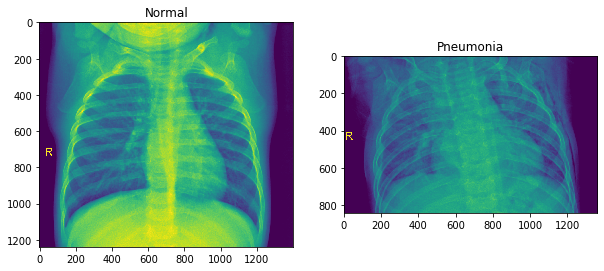

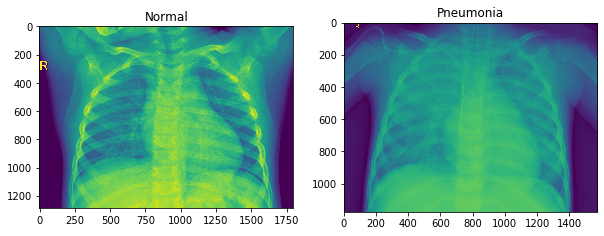

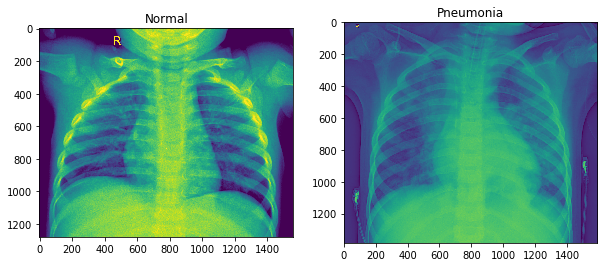

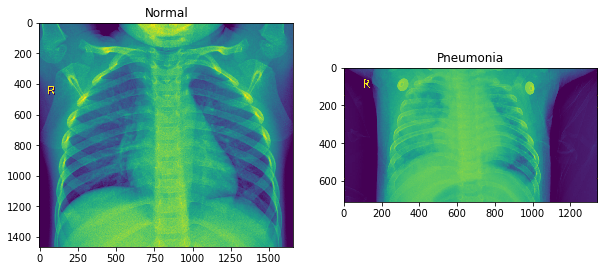

In [172]:
#let'see some images which are randomly generated
for i in range(1,5):
    print(len(os.listdir(train_n)))
    rand_norm= np.random.randint(0,len(os.listdir(train_n)))
    norm_pic = os.listdir(train_n)[rand_norm]
    print('normal picture title: ',norm_pic)

    norm_pic_address = train_n+norm_pic
    norm_load = Image.open(norm_pic_address)

    #Pneumonia
    rand_p = np.random.randint(0,len(os.listdir(train_p)))

    sic_pic =  os.listdir(train_p)[rand_norm]
    sic_address = train_p+sic_pic
    print('pneumonia picture title:', sic_pic)

    # Load the images
    norm_load = Image.open(norm_pic_address)
    sic_load = Image.open(sic_address)

    #Let's plt these images
    f = plt.figure(figsize= (10,6))
    a1 = f.add_subplot(1,2,1)
    img_plot = plt.imshow(norm_load)
    a1.set_title('Normal')

    a2 = f.add_subplot(1, 2, 2)
    img_plot = plt.imshow(sic_load)
    a2.set_title('Pneumonia')

# CNN model with 3 ConVol layers and adding dropout

In [173]:
#let's make a cnn model from scratch
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()

#convlution 
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
model.add(Activation('relu'))

#pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#2nd convolution
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

#2nd pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#3rd convolution
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

#3rd pooling
model.add(MaxPooling2D(pool_size=(2, 2)))


In [174]:
#flatten
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

#Fully Connected layer
model.add(Activation('relu'))

#adding dropout
model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),   #using Adam optimizer
              metrics=['accuracy'])

In [175]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_36 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_37 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 12, 12, 64)      

# Data Augmentation and preprocessing

In [176]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

pic_address = train_n+norm_pic

img = load_img(pic_address)  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='G:/chest_xray/train', save_prefix='sample', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

normal picture title:  NORMAL2-IM-1341-0001.jpeg


AxesImage(54,36;334.8x217.44)


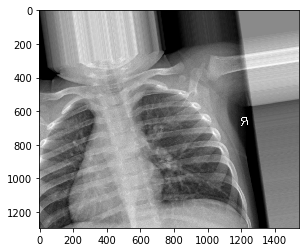

AxesImage(54,36;334.8x217.44)


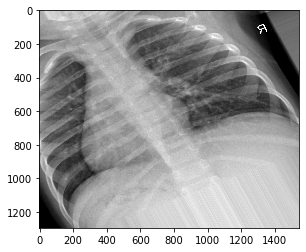

AxesImage(54,36;334.8x217.44)


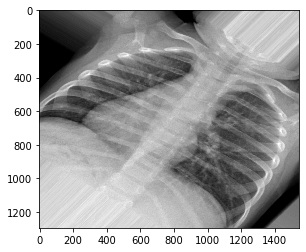

AxesImage(54,36;334.8x217.44)


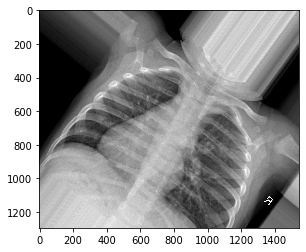

AxesImage(54,36;334.8x217.44)


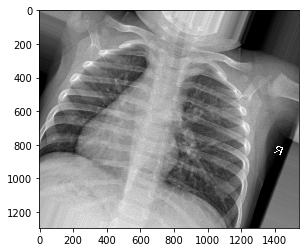

AxesImage(54,36;334.8x217.44)


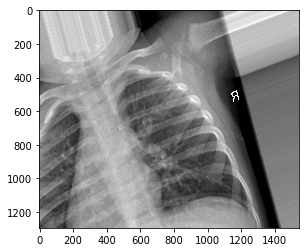

AxesImage(54,36;334.8x217.44)


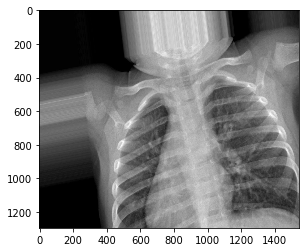

AxesImage(54,36;334.8x217.44)


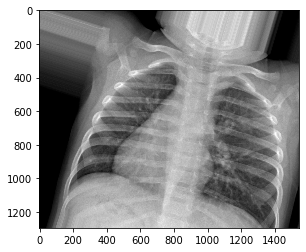

AxesImage(54,36;334.8x217.44)


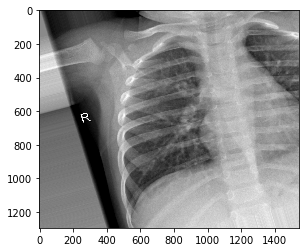

AxesImage(54,36;334.8x217.44)


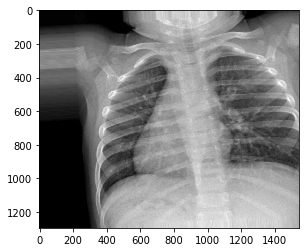

AxesImage(54,36;334.8x217.44)


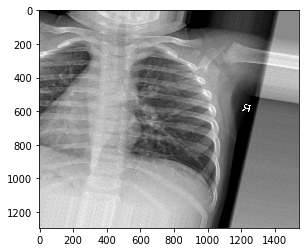

AxesImage(54,36;334.8x217.44)


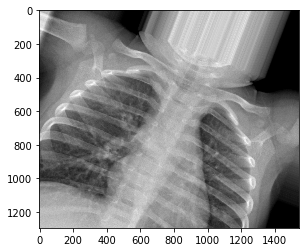

AxesImage(54,36;334.8x217.44)


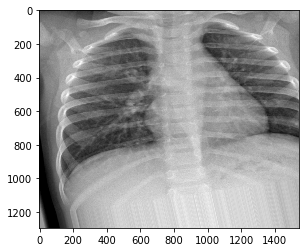

AxesImage(54,36;334.8x217.44)


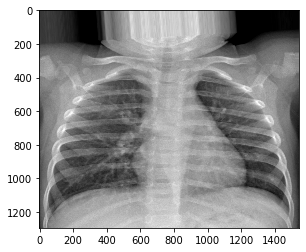

AxesImage(54,36;334.8x217.44)


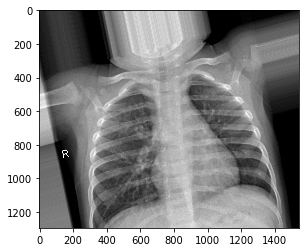

AxesImage(54,36;334.8x217.44)


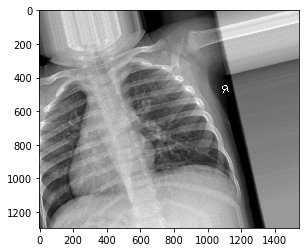

AxesImage(54,36;334.8x217.44)


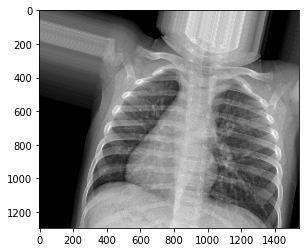

AxesImage(54,36;334.8x217.44)


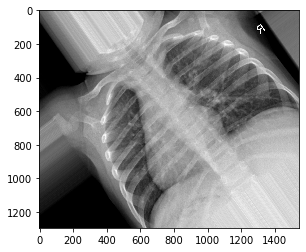

AxesImage(54,36;334.8x217.44)


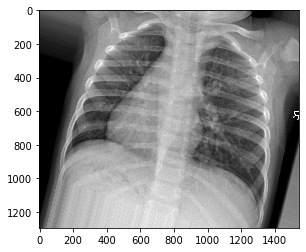

AxesImage(54,36;334.8x217.44)


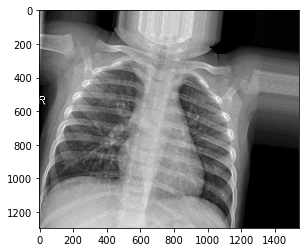

In [182]:
train_folder = 'G:/chest_xray/train'
os.listdir(train_folder)
preview= train_folder+'/preview/'

for img in range(1,21):
    pic_path = os.listdir(preview)[img]
    pic_add = preview+pic_path
    pic_img= Image.open(pic_add)
    print(plt.imshow(pic_img))
    plt.show()

In [32]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_datagen = ImageDataGenerator(rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                    horizontal_flip=True,
                                        fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('G:/chest_xray/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('G:/chest_xray/chest_xray/val',
                                                                target_size=(64, 64),
                                                                        batch_size=32,
                                                                    class_mode='binary')

test_set = test_datagen.flow_from_directory('G:/chest_xray/chest_xray/test',
                                                    target_size = (64, 64),
                                                            batch_size = 32,
                                                        class_mode = 'binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

# Fitting CNN model

In [33]:
cnn_model1 = model.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 427s 3s/step - loss: 0.5907 - accuracy: 0.7314 - val_loss: 0.8602 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 417s 3s/step - loss: 0.5400 - accuracy: 0.7471 - val_loss: 0.8660 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 419s 3s/step - loss: 0.4617 - accuracy: 0.7770 - val_loss: 0.6756 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 423s 3s/step - loss: 0.4061 - accuracy: 0.8104 - val_loss: 0.6955 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 420s 3s/step - loss: 0.3690 - accuracy: 0.8280 - val_loss: 0.5291 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 426s 3s/step - loss: 0.3579 - accuracy: 0.8332 - val_loss: 0.5018 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 424s 3s/step - loss: 0.3347 - accuracy: 0.8497 - val_loss: 0.5727 - val_accuracy: 0.7500

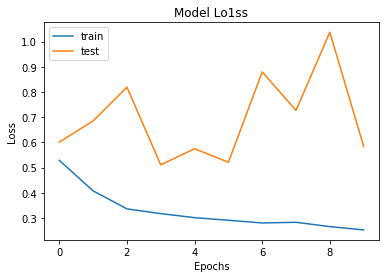

In [13]:
plt.plot(cnn_model1.history['loss'])
plt.plot(cnn_model1.history['val_loss'])
plt.title('Model Lo1ss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

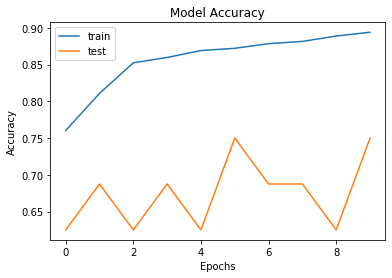

In [14]:
plt.plot(cnn_model1.history['accuracy'])
plt.plot(cnn_model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

The above accuracy plot shows the train{accuracy} is greater than test{accuracy}. It means above CNN model  overfitting problem

# CNN model with 2 Convolution layers

In [65]:
model_1 = Sequential()

#convlution 
model_1.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
model_1.add(Activation('relu'))

#pooling
model_1.add(MaxPooling2D(pool_size=(2, 2)))

#2nd convolution
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))

#2nd pooling
model_1.add(MaxPooling2D(pool_size=(2, 2)))


In [66]:
# Flatten the layer
model_1.add(Flatten())

# Fully Connected Layers
model_1.add(Dense(activation = 'relu', units = 128))
model_1.add(Dense(activation = 'sigmoid', units = 1))


In [67]:
# Compile the Neural network
model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Data Augmenatation

In [68]:
train_datagen1 = ImageDataGenerator(rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                    horizontal_flip=True)



test_datagen1 = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set1 = train_datagen1.flow_from_directory('G:/chest_xray/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator1 = test_datagen1.flow_from_directory('G:/chest_xray/chest_xray/val',
                                                                target_size=(64, 64),
                                                                        batch_size=32,
                                                                    class_mode='binary')

test_set1 = test_datagen1.flow_from_directory('G:/chest_xray/chest_xray/test',
                                                    target_size = (64, 64),
                                                            batch_size = 32,
                                                        class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [69]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_30 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)            

In [70]:
cnn = model_1.fit_generator(training_set1,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = validation_generator1,
                         validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 360s 2s/step - loss: 0.4605 - accuracy: 0.7826 - val_loss: 0.6203 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 312s 2s/step - loss: 0.3899 - accuracy: 0.8196 - val_loss: 0.5983 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 303s 2s/step - loss: 0.3272 - accuracy: 0.8508 - val_loss: 0.6430 - val_accuracy: 0.5625
Epoch 4/10
163/163 [==============================] - 296s 2s/step - loss: 0.3143 - accuracy: 0.8583 - val_loss: 0.5078 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 290s 2s/step - loss: 0.3110 - accuracy: 0.8591 - val_loss: 0.4972 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 289s 2s/step - loss: 0.3084 - accuracy: 0.8564 - val_loss: 0.5944 - val_accuracy: 0.6875
Epoch 7/10
163/163 [==============================] - 292s 2s/step - loss: 0.2822 - accuracy: 0.8715 - val_loss: 0.5681 - val_accuracy: 0.6875

# plotting loss and accuracy

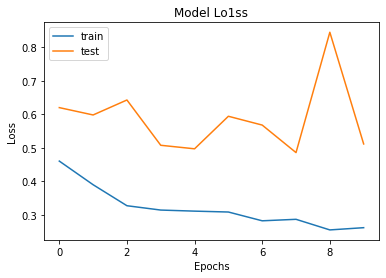

In [77]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Model Lo1ss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

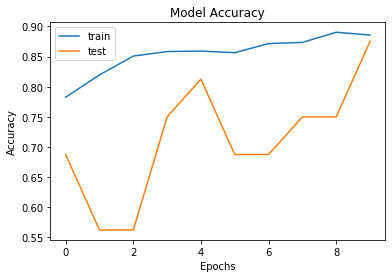

In [78]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Saving model weights

In [84]:
model_1.save_weights('G:/chest_xray/first_try.h5')

In [82]:
test_accu = model_1.evaluate_generator(test_set1,steps=624)

In [83]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 89.2717719078064 %


let's see that this is the best result achieved on this dataset. The model has a high accuracy. It is much better than my previous model {model_1: # CNN model with 3 ConVol layers and adding dropout}

finally the above model well predicting or classifying unseen data. The use of this model is no need doctor to ponder these images to gause things. This is the task of reading and classifying the 'NORMAL' and 'PNUMONIA' images and not shot at doctors and their jobs. 
                *** AI technologies can beat anything and working very well better than humans***